In [59]:
# Questions 3 & 4)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Questions 5 & 6)

gdp_df = pd.read_csv('../data/gdp_per_capita.csv', skipfooter=5, usecols=[0,1,2], header=0, names=['Country', 'Year', 'GDP Per Capita'])

<ipython-input-3-ef3469009507>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  gdp_df = pd.read_csv('../data/gdp_per_capita.csv', skipfooter=5, usecols=[0,1,2], header=0, names=['Country', 'Year', 'GDP Per Capita'])


In [5]:
gdp_df.isna().any()

Country           False
Year              False
GDP Per Capita    False
dtype: bool

In [6]:
# Question 7)

gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6866 entries, 0 to 6865
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6866 non-null   object 
 1   Year            6866 non-null   int64  
 2   GDP Per Capita  6866 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.0+ KB


In [7]:
# Question 8)

gdp_df['Year'].max() 

2019

In [8]:
# Question 8)

gdp_df['Year'].min()

1990

In [9]:
gdp_df['Year'].value_counts(ascending=True)

1990    206
1991    207
1992    209
1993    212
1994    214
1995    221
1996    221
1998    223
1997    223
1999    224
2000    231
2019    231
2001    232
2002    233
2003    233
2004    234
2005    234
2007    235
2006    235
2008    235
2010    236
2009    236
2011    237
2018    237
2012    237
2013    238
2015    238
2017    238
2016    238
2014    238
Name: Year, dtype: int64

In [10]:
# Question 9)

gdp_df['Country'].value_counts()

Netherlands                  30
Eswatini                     30
Low & middle income          30
Nicaragua                    30
IDA only                     30
                             ..
Nauru                        16
Cayman Islands               13
Sint Maarten (Dutch part)    10
Turks and Caicos Islands      9
Djibouti                      7
Name: Country, Length: 238, dtype: int64

In [74]:
# Question 10)

gdp_2014 = gdp_df[gdp_df['Year']==2014]    # CAN ALSO RUN gdp_df[gdp_df['Year'].isin(['2014'])]

In [75]:
gdp_2014

,Country,Year,GDP Per Capita,Continent
5,Afghanistan,2014,2102.385234,Asia
23,Albania,2014,11623.866679,Europe
53,Algeria,2014,11512.705405,Africa
83,Angola,2014,8239.828837,Africa
113,Antigua and Barbuda,2014,18104.241470,North America
...,...,...,...,...
6727,Vietnam,2014,6098.489609,Asia
6757,West Bank and Gaza,2014,5967.073437,Asia
6783,World,2014,15189.648507,NaN
6813,Zambia,2014,3450.046561,Africa


In [76]:
# Question 11)

gdp_2014.describe()

,Year,GDP Per Capita
count,238.0,238.000000
mean,2014.0,19766.710348
std,0.0,20983.869623
min,2014.0,822.610458
25%,2014.0,4753.110934
50%,2014.0,12209.385755
75%,2014.0,26803.610474
max,2014.0,156514.133850


array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'GDP Per Capita'}>]], dtype=object)

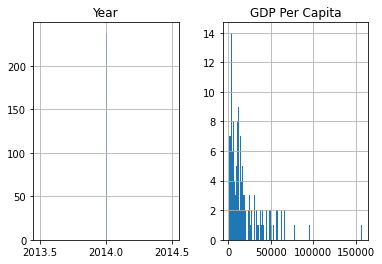

In [77]:
# Question 12)

gdp_2014.hist(bins=238)

In [78]:
# Question 13)

gdp_2014.nlargest(5, 'GDP Per Capita')

,Country,Year,GDP Per Capita,Continent
3721,"Macao SAR, China",2014,156514.133850,Asia
3691,Luxembourg,2014,108760.916030,Europe
5138,Qatar,2014,95578.416973,Asia
5464,Singapore,2014,87808.663157,Asia
561,Bermuda,2014,77361.104881,North America


In [79]:
gdp_2014.nsmallest(5, 'GDP Per Capita')

,Country,Year,GDP Per Capita,Continent
1047,Central African Republic,2014,822.610458,Africa
827,Burundi,2014,886.235777,Africa
3781,Malawi,2014,1027.208496,Africa
1422,Dem. Rep. Congo,2014,1029.790785,Africa
4528,Niger,2014,1127.615541,Africa


In [117]:
# Question 14)

gdp_pivoted = pd.pivot_table(gdp_df[gdp_df['Year'].isin([1990, 2017])], 
                             values=['GDP Per Capita'], 
                             index=['Country'], 
                             columns=['Year'],
                             fill_value=0) # DO THIS HERE -- USING .fillna(0) LATER DOES NOT SEEM TO FIX THIS --
                                     # SEE https://stackoverflow.com/questions/39632277/pandas-nan-introduced-by-pivot-table

In [118]:
gdp_pivoted

GDP Per Capita              
Year                          1990          2017
Country                                         
Afghanistan               0.000000   2058.383832
Albania                4842.734635  12811.759436
Algeria                8746.352901  11737.409353
Angola                 5783.429064   7310.901738
Antigua and Barbuda   15459.551675  19840.076123
...                            ...           ...
Vietnam                1673.249634   7155.745829
West Bank and Gaza        0.000000   6401.740891
World                  9680.269697  16253.385518
Zambia                 2190.182814   3485.005238
Zimbabwe                  0.000000   3028.245976

[238 rows x 2 columns]

In [121]:
gdp_pivoted.isna().any()

                Year
GDP Per Capita  1990    False
                2017    False
dtype: bool

In [141]:
#  Question 15) We want 100*(gdp_pivoted['2017']-gdp_pivoted['1990'])/gdp_pivoted['1990'] --
#     -- BUT WHAT ABOUT DIVIDE-BY-ZERO ERRORS? (SHOULD WE BEGIN WITH THE FIRST NON-ZERO YEAR FOR SUCH COUNTRIES?)

pivx100 = np.multiply(100, np.subtract(gdp_pivoted.iloc[:, [1]], gdp_pivoted.iloc[:, [0]]))

In [145]:
np.true_divide(pivx100, gdp_pivoted.iloc[:, [0]])

<ipython-input-145-4d6730748cd6>:3: RuntimeWarning: divide by zero encountered in true_divide
  np.true_divide(pivx100, gdp_pivoted.iloc[:, [0]])


,GDP Per Capita
Year,2017
Country,
Afghanistan,inf
Albania,164.556297
Algeria,34.197756
Angola,26.411194
Antigua and Barbuda,28.335391
...,...
Vietnam,327.655604
West Bank and Gaza,inf


In [29]:
# Question 18)

continents = pd.read_csv('../data/continents.csv')

In [30]:
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


In [31]:
# Question 19)

gdp_df = gdp_df.join(continents.set_index('Country'), on='Country')

In [32]:
gdp_df

,Country,Year,GDP Per Capita,Continent
0,Afghanistan,2019,2065.036398,Asia
1,Afghanistan,2018,2033.779002,Asia
2,Afghanistan,2017,2058.383832,Asia
3,Afghanistan,2016,2057.062164,Asia
4,Afghanistan,2015,2068.265904,Asia
...,...,...,...,...
6861,Zimbabwe,1996,3520.430146,Africa
6862,Zimbabwe,1995,3226.413930,Africa
6863,Zimbabwe,1994,3263.934978,Africa
6864,Zimbabwe,1993,3033.504852,Africa


In [50]:
# Question 20) - Number of countries per continent - DOING ONLY MOST RECENT YEAR TO AVOID DUPLICATES

# gdp_df.Country.unique()
# gdp_df.groupby(gdp_df['Country'].unique()) THROWS "Grouper and axis must be the same length" ERROR

gdp_df[gdp_df['Year']==2019].groupby(['Continent','Year'])['Country'].count()

Continent      Year
Africa         2019    49
Asia           2019    42
Europe         2019    44
North America  2019    24
Oceania        2019    12
South America  2019    11
Name: Country, dtype: int64

In [ ]:
# TEST - LIST SOUTH AMERICAN COUNTRIES JUST TO TEST GROUPBY ACCURACY

# ** TODO - gdp_df([gdp_df['Year']==2019] & [gdp]).groupby(['Continent','Year'])['Country'].count() **

<AxesSubplot:xlabel='Continent,Year'>

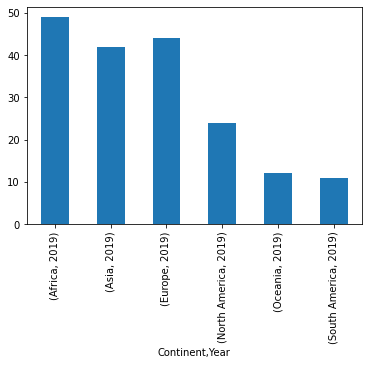

In [51]:
gdp_df[gdp_df['Year']==2019].groupby(['Continent','Year'])['Country'].count().plot(kind = 'bar')

In [66]:
# Question 21) Seaborn box plot of GDP per capita by continent in 2014

gdp_df[gdp_df['Year']==2014].groupby('Continent')['GDP Per Capita'].sum()

Continent
Africa           2.928373e+05
Asia             1.111780e+06
Europe           1.532948e+06
North America    6.189731e+05
Oceania          1.621359e+05
South America    1.707547e+05
Name: GDP Per Capita, dtype: float64

In [72]:
gdp_cont_2014 = gdp_df[gdp_df['Year']==2014].groupby('Continent')['GDP Per Capita'].sum()

<AxesSubplot:xlabel='Continent'>

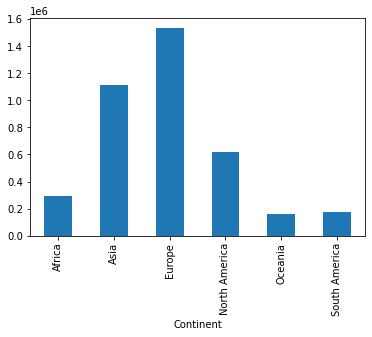

In [73]:
# WORKS FINE IN matplotlib

gdp_cont_2014.plot(kind='bar')

In [149]:
# WEIRD ERRORS IN seaborn - SEE https://stackoverflow.com/questions/63094143/valueerror-could-not-interpret-input-in-seaborn,
#                               https://stackoverflow.com/questions/31632637/label-axes-on-seaborn-barplot

ax = sns.boxplot(data=gdp_cont_2014, x='Continent', y='GDP Per Capita')
ax.set(xlabel='Continent', y='GDP Per Capita')
plt.show()

ValueError: Could not interpret input 'Continent'

In [155]:
# Questions 22 & 23)  -- CAN skipfooter=191 TO DELETE TRASH AT BOTTOM, BUT THEN GET ParserError: ',' expected after '"' 
#                        (ALSO IF YOU SPECIFY engine=python)

internet_df = pd.read_csv('../data/internet_use.csv', header=0, usecols=[0,1,2], names=['Country', 'Year', 'Internet_Users_Pct'])

In [156]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.39
1,Afghanistan,2013,5.9
2,Afghanistan,2012,5.45454545454545
3,Afghanistan,2011,5
4,Afghanistan,2010,4
...,...,...,...
4671,176,NTIA/CPS survey.,NaN
4672,177,"Pew Internet Project, Internet",Broadband and cell phone statistics
4673,178,Estimated based on Survey's results. Populatio...,NaN
4674,179,Preliminary. Country estimate.,NaN


In [157]:
# Question 24)

internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4676 entries, 0 to 4675
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             4676 non-null   object
 1   Year                4676 non-null   object
 2   Internet_Users_Pct  4496 non-null   object
dtypes: object(3)
memory usage: 109.7+ KB


In [158]:
internet_df['Internet_Users_Pct'] = pd.to_numeric(internet_df['Internet_Users_Pct'], errors='coerce')

In [159]:
# Question 25)

# internet_df['Year'][internet_df['Internet_Users_Pct']==0]   # .unique()

internet_df[internet_df['Internet_Users_Pct']==0] 

,Country,Year,Internet_Users_Pct
14,Afghanistan,1990,0.0
35,Albania,1990,0.0
57,Algeria,1990,0.0
58,American Samoa,1990,0.0
77,Andorra,1990,0.0
...,...,...,...
4408,Viet Nam,1990,0.0
4430,Virgin Islands (U.S.),1990,0.0
4450,Yemen,1990,0.0
4472,Zambia,1990,0.0


In [160]:
# Question 26)  MUST CONVERT ['Year'] DATA TYPE

gdp_df.join(internet_df.set_index('Country'), on='Country')

ValueError: columns overlap but no suffix specified: Index(['Year'], dtype='object')

In [161]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6866 entries, 0 to 6865
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6866 non-null   object 
 1   Year            6866 non-null   int64  
 2   GDP Per Capita  6866 non-null   float64
 3   Continent       5441 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 214.7+ KB


In [162]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4676 entries, 0 to 4675
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4676 non-null   object 
 1   Year                4676 non-null   object 
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), object(2)
memory usage: 109.7+ KB


In [163]:
internet_df['Year'].astype(np.int64)

ValueError: invalid literal for int() with base 10: 'Footnote'